<a href="https://colab.research.google.com/github/chacha86/BigData3/blob/colab/%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C1_%ED%92%80%EC%9D%B41_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 각 특성 데이터 설명
# age : 환자의 나이
# anaemia : 환자의 빈혈증 여부(0: 정상, 1: 빈혈)
# creatinine_phosphokinase: 크레아틴키나제 검사 결과
# diabetes : 당뇨 여부 (0: 정상, 1: 당뇨)
# ejection_fraction : 박출계수(%)
# high_blood_pressure : 고혈압여부 (0: 정상, 1: 고혈압)
# platelets : 혈소판 수 (kiloplatelets/mL)
# serum_creatinine : 혈중 크레아틴 레벨(mg/dL)
# serum_sodium : 혈중 나트륨 레벨(mEq/L)
# sex : 성별(0: 여성, 1: 남성)
# smoking : 흡연 여부 (0: 비흡연, 1: 흡연)
# time : 관찰기관(일)
# DEATH_EVENT : 사망 여부 (0: 생존, 1: 사망) -> 타겟

# 심부전증으로 인한 사망여부 예측하기

In [14]:
 # 1. 판다스로 데이터 읽어ㅇ
 df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
 

In [15]:
# 2. 데이터의 개수, 데이터 타입, 결측치 확인
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


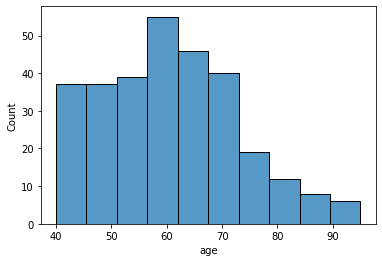

In [4]:
# 3. 시각화를 이용한 탐색적 분석
# 히스토그램을 이용해 각 수치데이터의 데이터 분포 및 상관관계 확인하

import seaborn as sns

sns.histplot(x='age', data=df)



In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
sns.histplot(x='creatinine_phosphokinase', data=df, hue='DEATH_EVENT')

In [ ]:
sns.histplot(x='ejection_fraction', data=df, hue='DEATH_EVENT')

In [19]:
# 4. 수치 데이터 정규화하기
#  - 정규화 하기 전에 카테고리형 데이터는 빼고 수치형 데이터만 정규화하기.
#  - 정규화된 수치형 데이터와 카테고리형 데이터를 다시 붙이기

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# 수치형 데이터
ndata = df[['age', 'creatinine_phosphokinase', 
       'ejection_fraction',  'platelets',
       'serum_creatinine', 'serum_sodium', 'time']] 

# 카테고리형 데이터
cdata = df[['sex', 'smoking', 'anaemia','diabetes','high_blood_pressure']]
# 타겟
target = df['DEATH_EVENT']

ss.fit(ndata)
ndata_s = ss.transform(ndata)
ndata_s = pd.DataFrame(ndata_s, columns=ndata.columns)

data = pd.concat((ndata_s, cdata), axis=1)
data


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,sex,smoking,anaemia,diabetes,high_blood_pressure
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,1,0,0,0,1
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,1,0,0,0,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,1,1,0,0,0
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,1,0,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.537688,-0.007077,-1.109765e+00,-0.284552,1.447094,1.803451,1,1,0,1,1
295,-0.491279,1.278215,-0.007077,6.802472e-02,-0.187726,0.539054,1.816357,0,0,0,0,0
296,-1.333392,1.525979,1.854958,4.902082e+00,-0.575031,0.312044,1.906697,0,0,0,1,0
297,-1.333392,1.890398,-0.007077,-1.263389e+00,0.005926,0.766064,1.932509,1,1,0,0,0


In [ ]:
# 5. 학습용 데이터와 테스트용 데이터로 나누기
from sklearn.model_selection import train_test_split
trd, tsd, trt, tst = train_test_split(data, target, random_state=1)


In [10]:
# 6. 로지스틱 회귀를 이용해 학습하고 평가하기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(trd, trt)
print(lr.score(trd, trt), lr.score(tsd, tst))

0.8303571428571429 0.8666666666666667


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

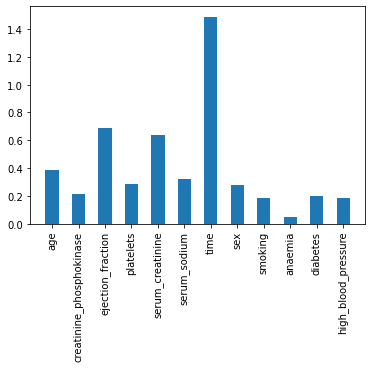

In [20]:
# 7. 데이터와 death와의 상관관계를 막대그래프로 그리고 가장 높은 특성을 3개 확인

from sklearn.preprocessing import StandardScaler 

coefs = lr.coef_
coefs2 = pd.Series(coefs.reshape(-1), index=data.columns.values)

coefs2 = np.abs(coefs2)
coefs3 = coefs2.sort_values(ascending=False)


lr.score(trd, trt), lr.score(tsd, tst)
# data - 통계적으로 의미 있는 데이터는?
# plt.scatter(data['creatinine_phosphokinase'], target)
# plt.hist(data['creatinine_phosphokinase']) # 데이터가 몰려있음. 통계적으로 의미를 가직 힘듦
# plt.hist(data['ejection_fraction']) # 위보다는 나음
# plt.hist(data['platelets']) # 그래프는 예쁘게 나오나

# DEATH_EVENT를 잘 따져주는 특성은?

x = coefs2.index.values
x
y = coefs2.values
y
plt.bar(x, y, width=0.5)
plt.xticks(rotation=90)


In [50]:
# 8. time 특성은 학습용 특성으로 적합하지 않음. 제거한 후  확률 경사 하강법으로 학습하기 (학습데이터에 대한 학습평가 75 이상, 테스트데이터에 대한 학습평가 76이상 맞춰보세요)

rdata = data.drop('time', axis=1)

trd, tsd, trt, tst = train_test_split(rdata, target, random_state=1)

trd_score_list = []
tsd_score_list = []

from sklearn.linear_model import SGDClassifier
# sc = SGDClassifier(loss='log', random_state=1)
# sc.C = 10

# for i in range(0, 1000) :
#   sc.partial_fit(trd, trt, classes=np.unique(trt))
#   trd_score_list.append(sc.score(trd, trt))
#   tsd_score_list.append(sc.score(tsd, tst))

# plt.plot(trd_score_list)
# plt.plot(tsd_score_list)

sc = SGDClassifier(loss='log', max_iter=700, tol=None, random_state=1)
sc.fit(trd, trt)

print(sc.score(trd, trt), sc.score(tsd, tst))

0.75 0.76


\